# Graphs for Diverse Led Funds

### Import Data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'


In [241]:
df = pd.read_csv(
    "../00_source_data/Corporate Investments in Diverse Led Funds - Top 100 VC.csv",
    header=7,
    index_col=0,
)
df.reset_index(inplace=True, drop=True)


In [242]:
df.sample(5)

,VC Firm,Claim to support Diversity?,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Response?,Countries,...,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised,Unnamed: 21,Unnamed: 22
36,Innovation Works,Yes with in depth detail,146.0,558.0,26.16%,3,https://innovationworks.org,info@innovationworks.org,NaN,USA,...,Seed,1999,Lisa Greenleaf,729,77.0,"$50,000","$150,000","$3,300,000,000",NaN,NaN
19,Index Ventures,Does not specify,118.0,1097.0,10.76%,55,https://indexventures.com,+1 (415) 471 1700,NaN,"USA, United Kingdom",...,"Seed, Pre-Seed, Series A, Series B",1996,"David Rimer, Giuseppe Zocco, Neil Rimer",1069,227.0,"$1,000,000","$10,000,000","$12,400,000,000",NaN,NaN
55,Seed Camp,Does not specify,10.0,537.0,1.86%,78,https://seedcamp.com,info@seedcamp.com,NaN,United Kingdom,...,Seed,2007,"Reshma Sohoni, Carlos Espinal",612,159.0,"£300,000","£500,000","£78,000,000",NaN,NaN
69,Shenzhen Capital Group,Does not specify,NaN,510.0,NaN,#VALUE!,http://www.szvc.com.cn/english/Home/index.shtml,master@szvc.com.cn,NaN,China,...,Late Stage,1999,NaN,489,85.0,NaN,NaN,"$651,900,000",NaN,NaN
14,Alumni Ventures Group,Launched an Anti-Bias Fund that offers investo...,350.0,1330.0,26.32%,2,https://www.av.vc/,info@avgfunds.com,NaN,USA,...,"Early Stage, Late Stage, Seed",2014,"Barrick Rothchild, Beth Obermiller, Luke Antal...",1205,98.0,"$250,000","$1,000,000","$1,000,000,000",NaN,NaN


In [243]:
# change DIP: Diversity Investment Percentage to float
df["DIP: Diversity Investment Percentage"] = (
    df["DIP: Diversity Investment Percentage"]
    .str.replace("%", "")
    .astype(float)
)


In [244]:
# drop if DIP: Diversity Investment Percentage is NaN
df = df[~df["DIP: Diversity Investment Percentage"].isna()]

### Create Graphs

#### Graph 1: Total investment count for top 100 VC firms

In [245]:
df_sorted = df.sort_values(by="Total Investment Count", ascending=False)
# fill na with 0
# df_sorted["Total Investment Count"] = df_sorted["Total Investment Count"].fillna(0)


In [246]:
df_sorted.describe()

,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,Response?,Founded Year,# of Investments,# of Exits,Unnamed: 21
count,91.000000,91.000000,91.000000,0.0,91.000000,91.000000,91.000000,0.0
mean,117.604396,894.681319,11.743516,NaN,1995.208791,865.296703,174.956044,NaN
std,162.914966,894.303949,6.995945,NaN,16.553963,686.246870,136.706410,NaN
min,0.000000,3.000000,0.000000,NaN,1911.000000,385.000000,3.000000,NaN
25%,41.500000,443.000000,7.070000,NaN,1985.000000,472.000000,90.000000,NaN
50%,80.000000,646.000000,12.750000,NaN,2000.000000,661.000000,145.000000,NaN
75%,139.500000,970.000000,15.875000,NaN,2007.000000,900.000000,200.000000,NaN
max,1140.000000,5538.000000,26.770000,NaN,2016.000000,4469.000000,951.000000,NaN


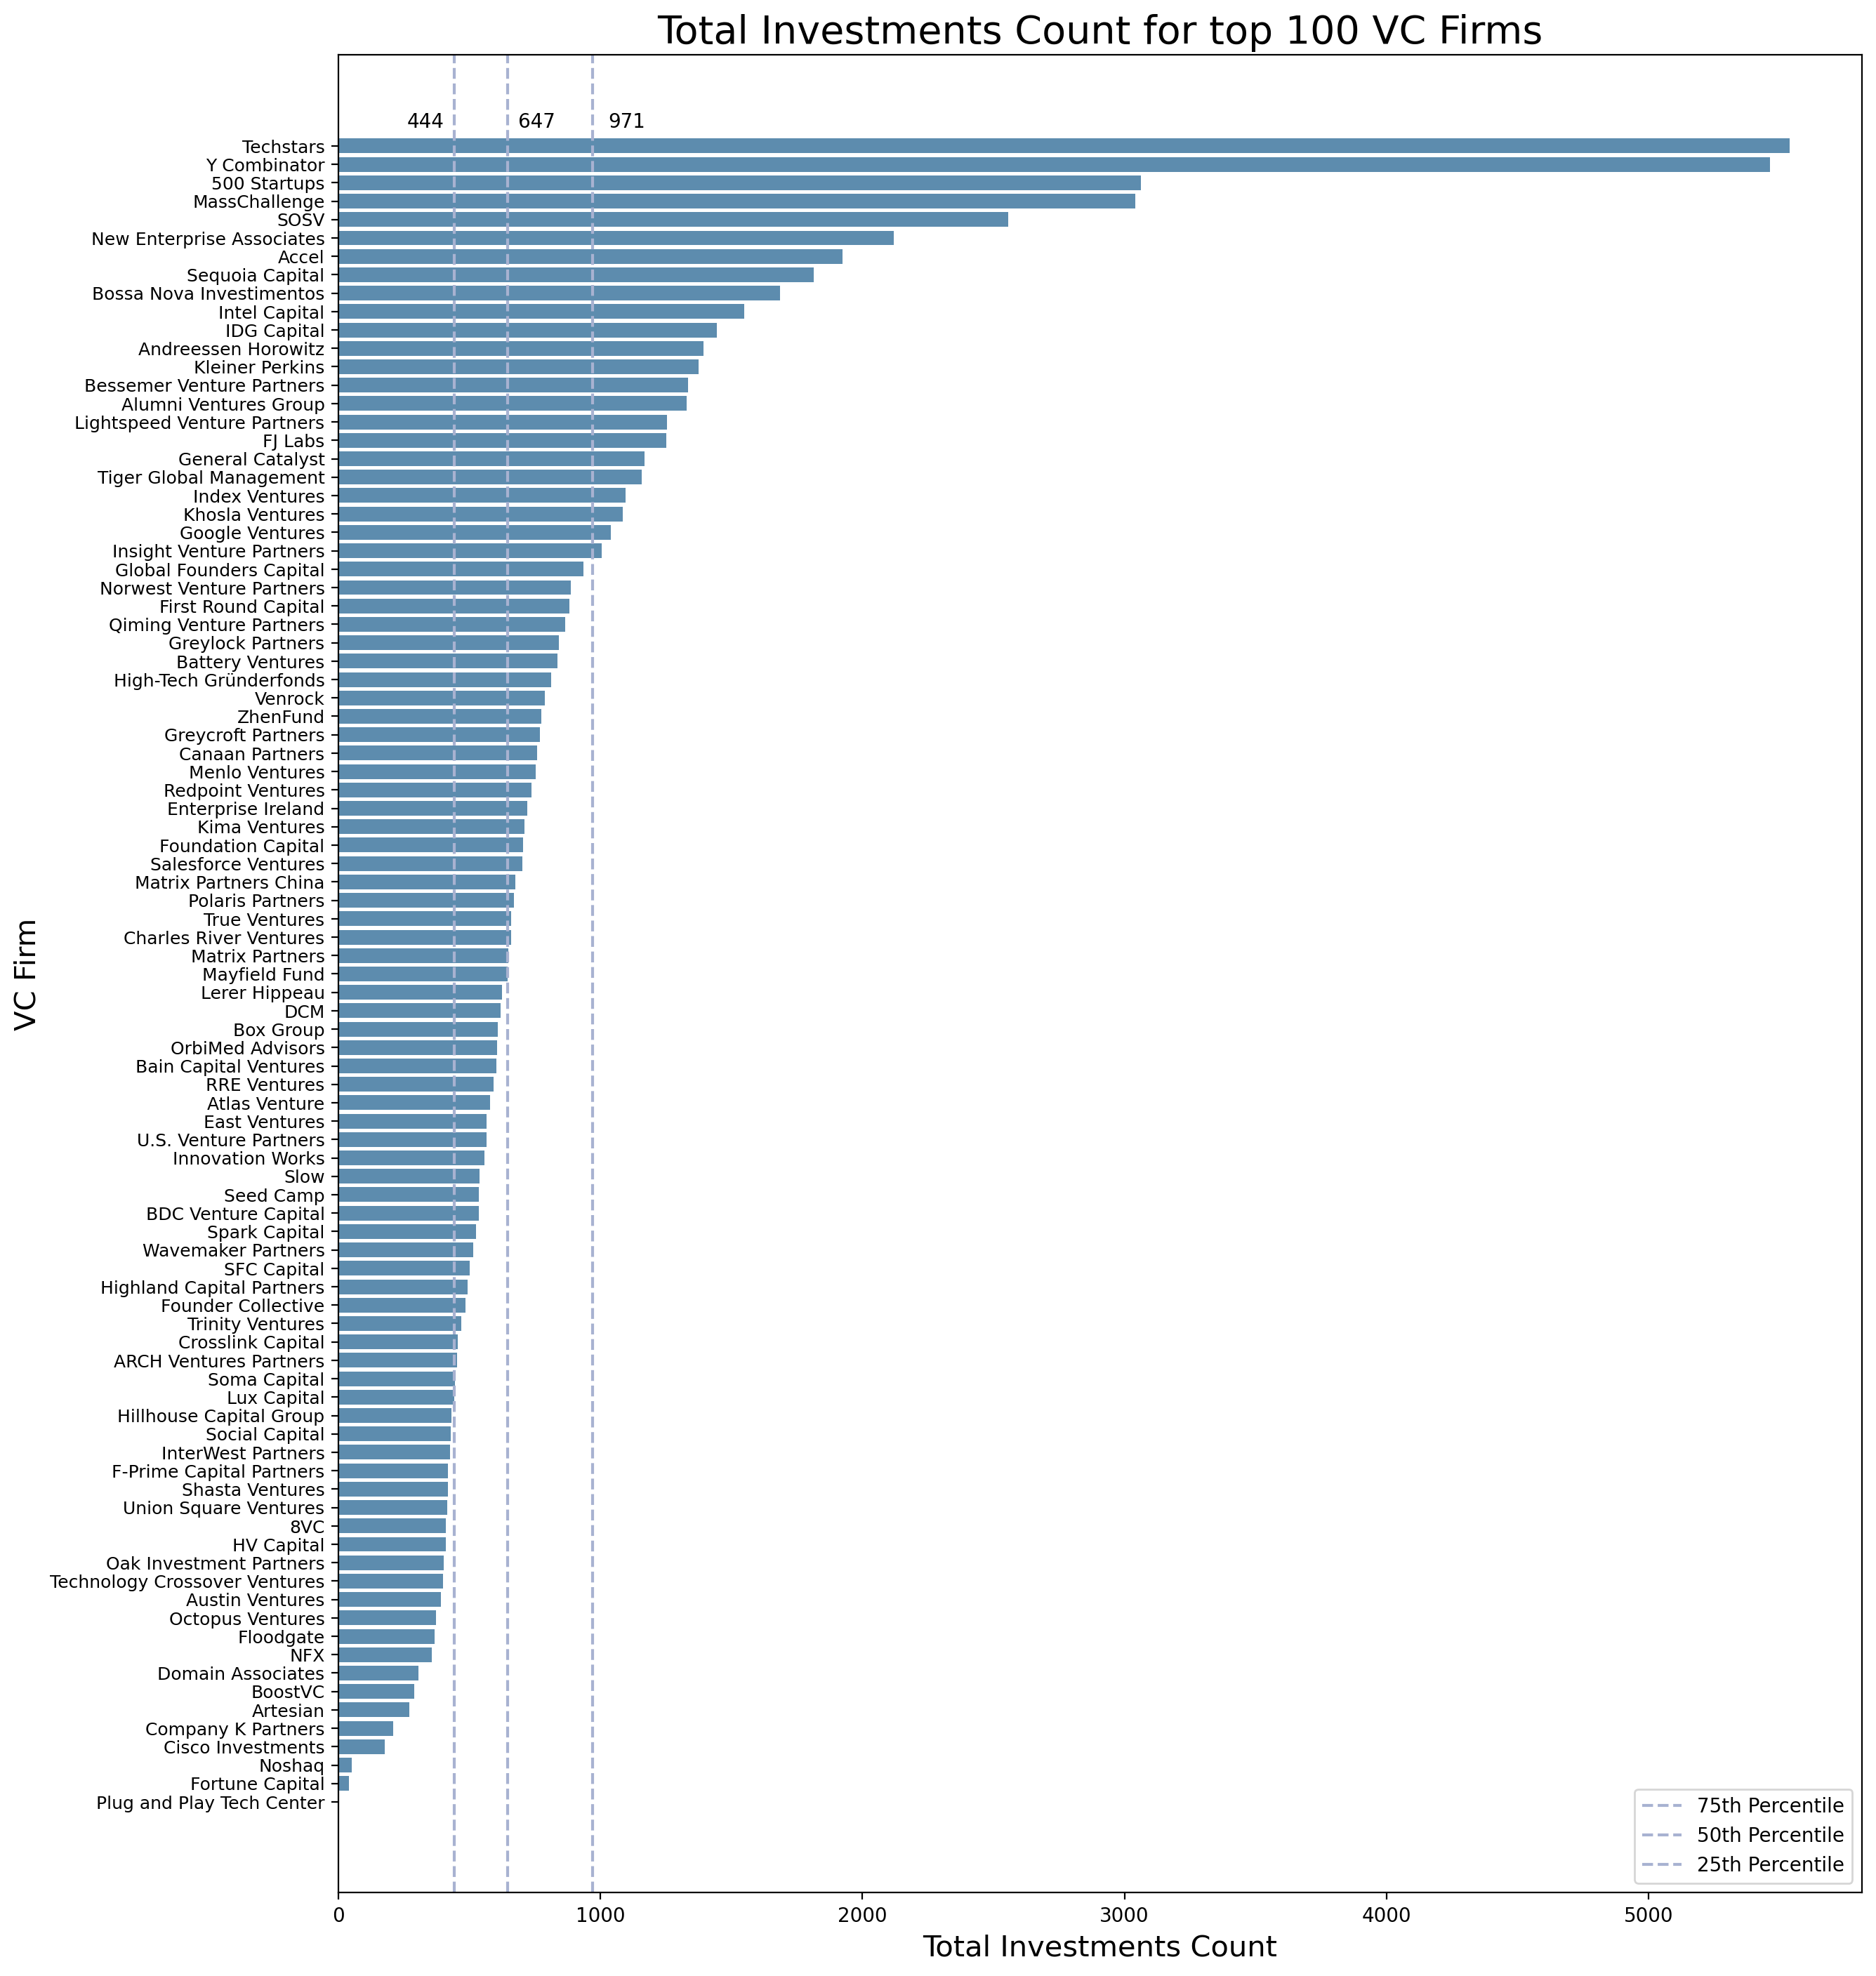

In [247]:
# create a bar chart of total investments count
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted["VC Firm"], df_sorted["Total Investment Count"], color="#5D8CAE"
)
ax.set_title("Total Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Total Investments Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 130, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [248]:
# save the figure
fig.savefig(
    "../30_results/Total Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


#### Graph 2: Diversity investment count for top 100 VC firms

In [249]:
# sort by Diversity Investment Count
df_sorted_di = df.sort_values(by="Diversity Investment Count", ascending=False)
# fill nan in Diversity Investment Count with 0
df_sorted_di["Diversity Investment Count"] = df_sorted_di[
    "Diversity Investment Count"
].fillna(0)

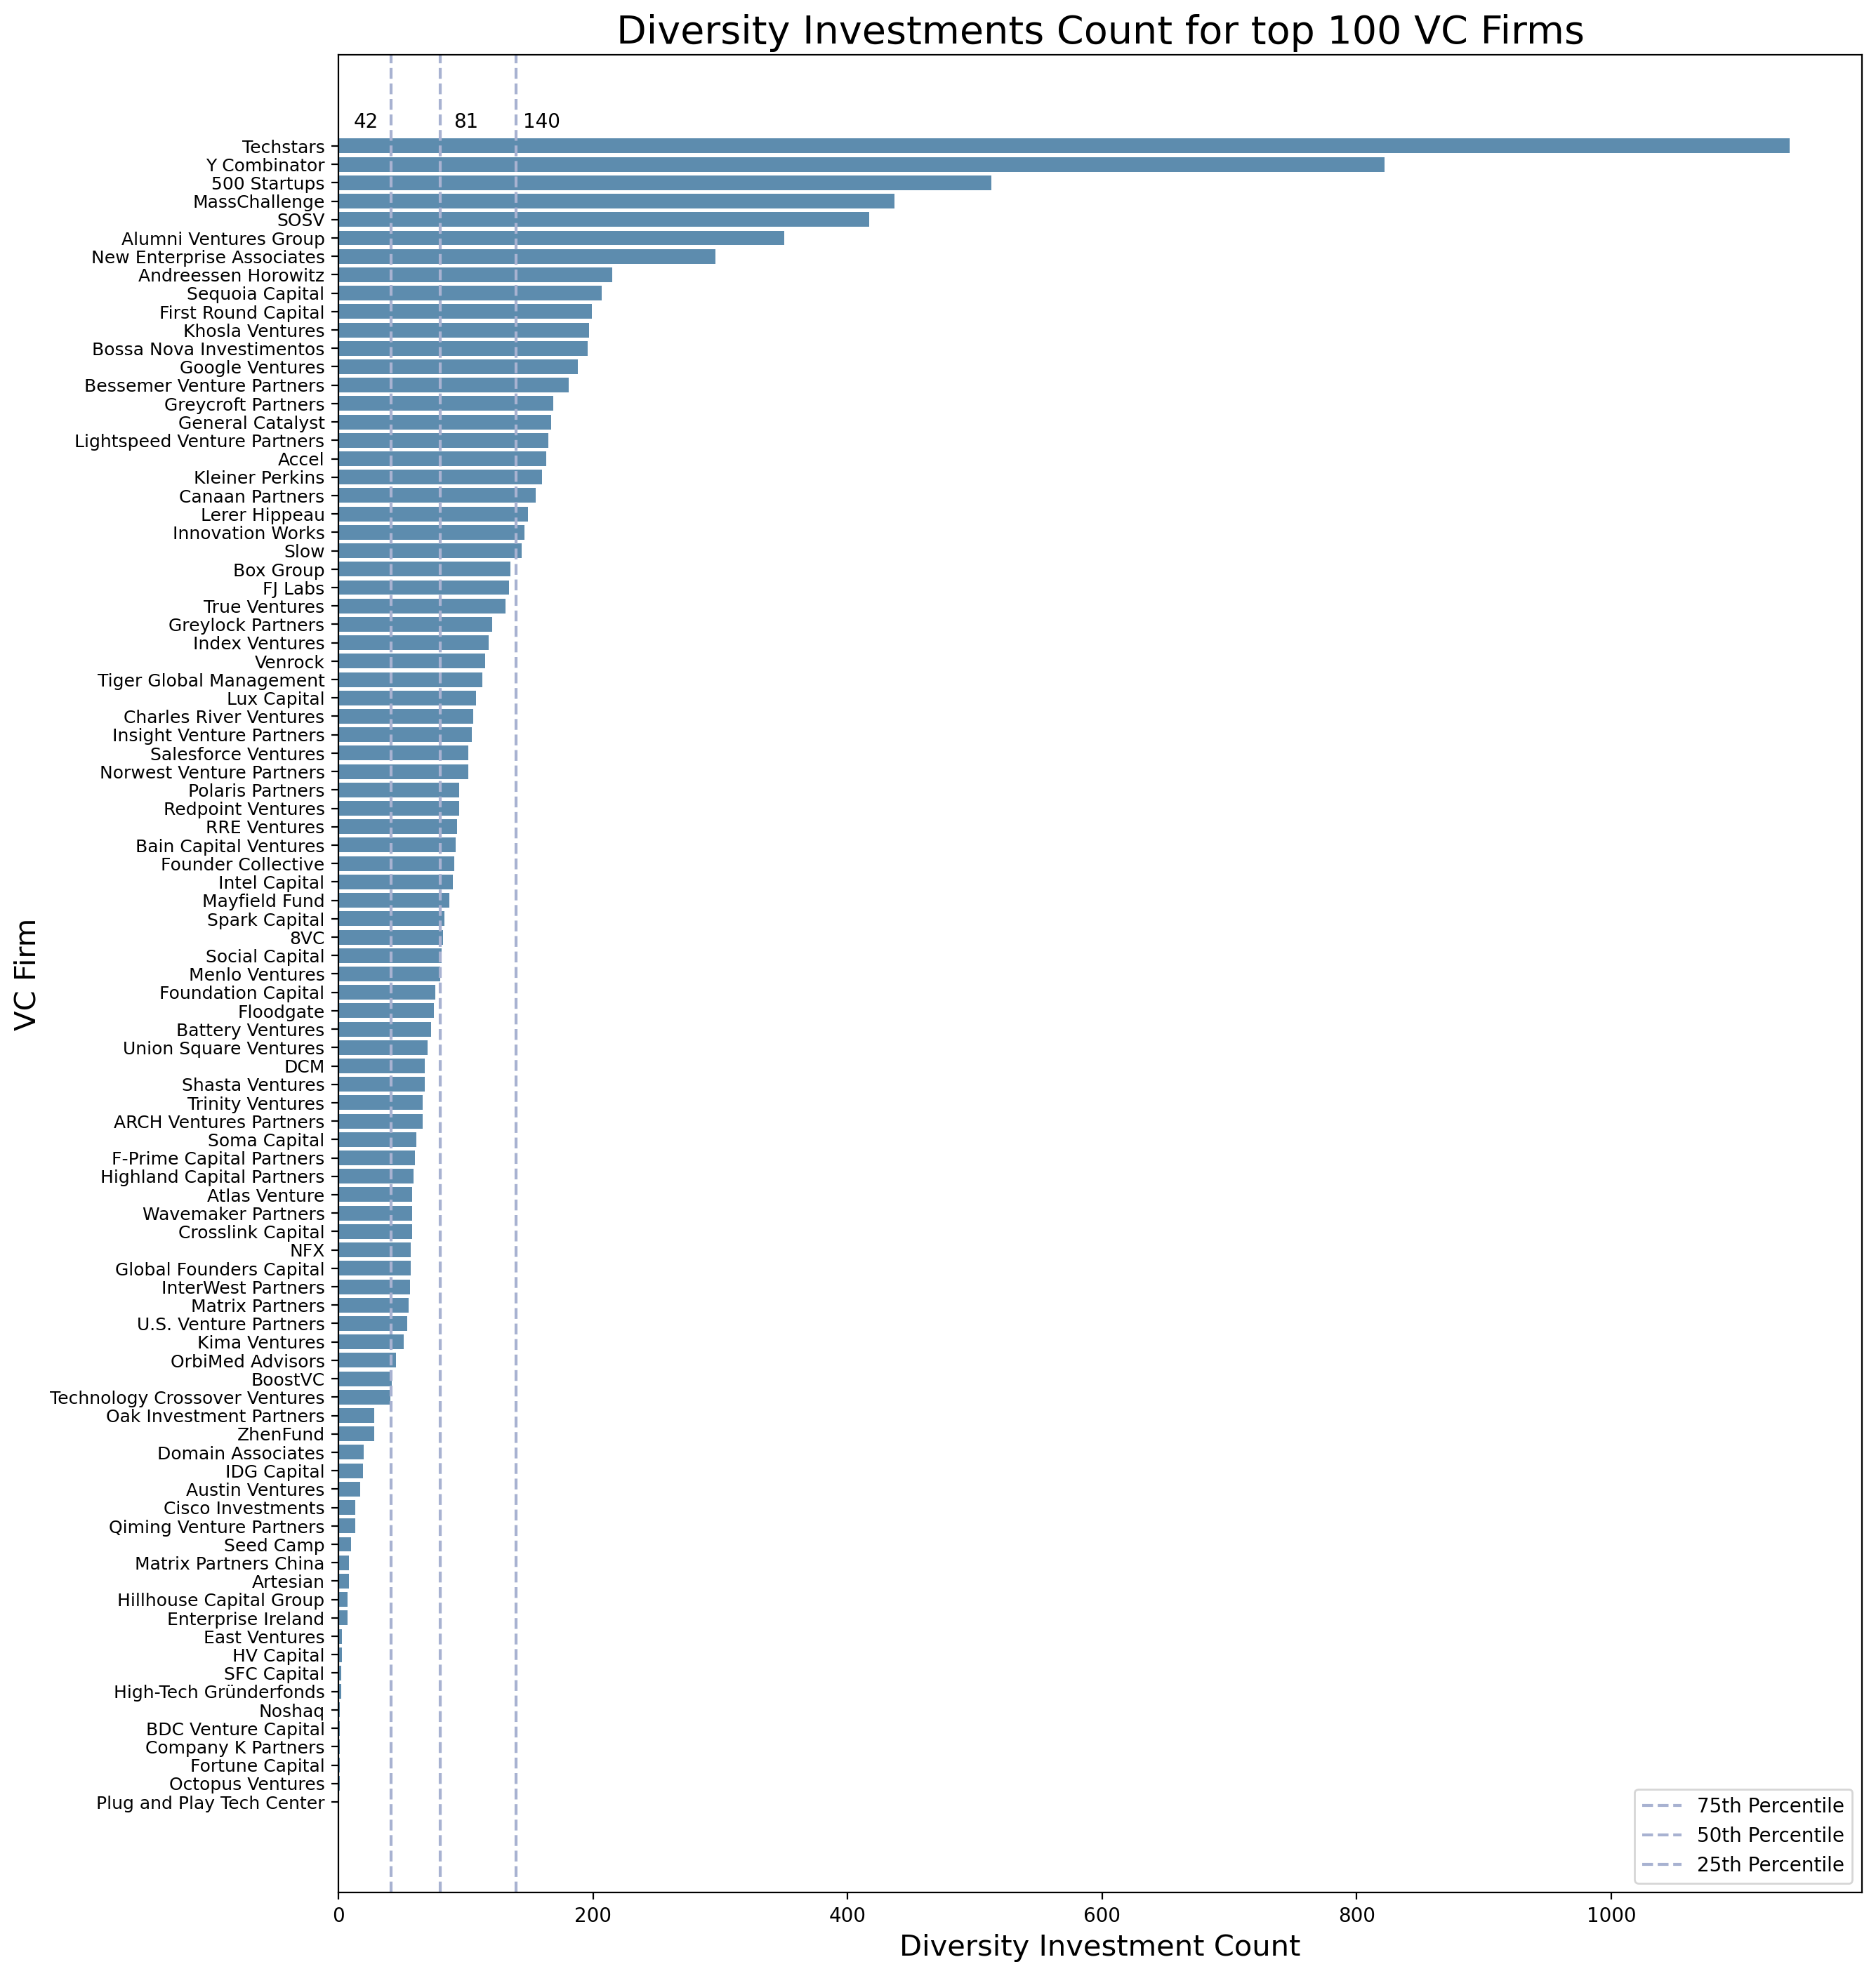

In [250]:
# create a bar chart of diversity investments count
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted_di["VC Firm"],
    df_sorted_di["Diversity Investment Count"],
    color="#5D8CAE",
)
ax.set_title("Diversity Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
pv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
pv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [251]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


#### Graph 3: Diversity investment percentage for top 100 VC firms

In [252]:
# sort by DIP: Diversity Investment Percentage
df_sorted_dip = df.sort_values(
    by="DIP: Diversity Investment Percentage", ascending=False
)
# drop nan
# df_sorted_dip.dropna(inplace=True)


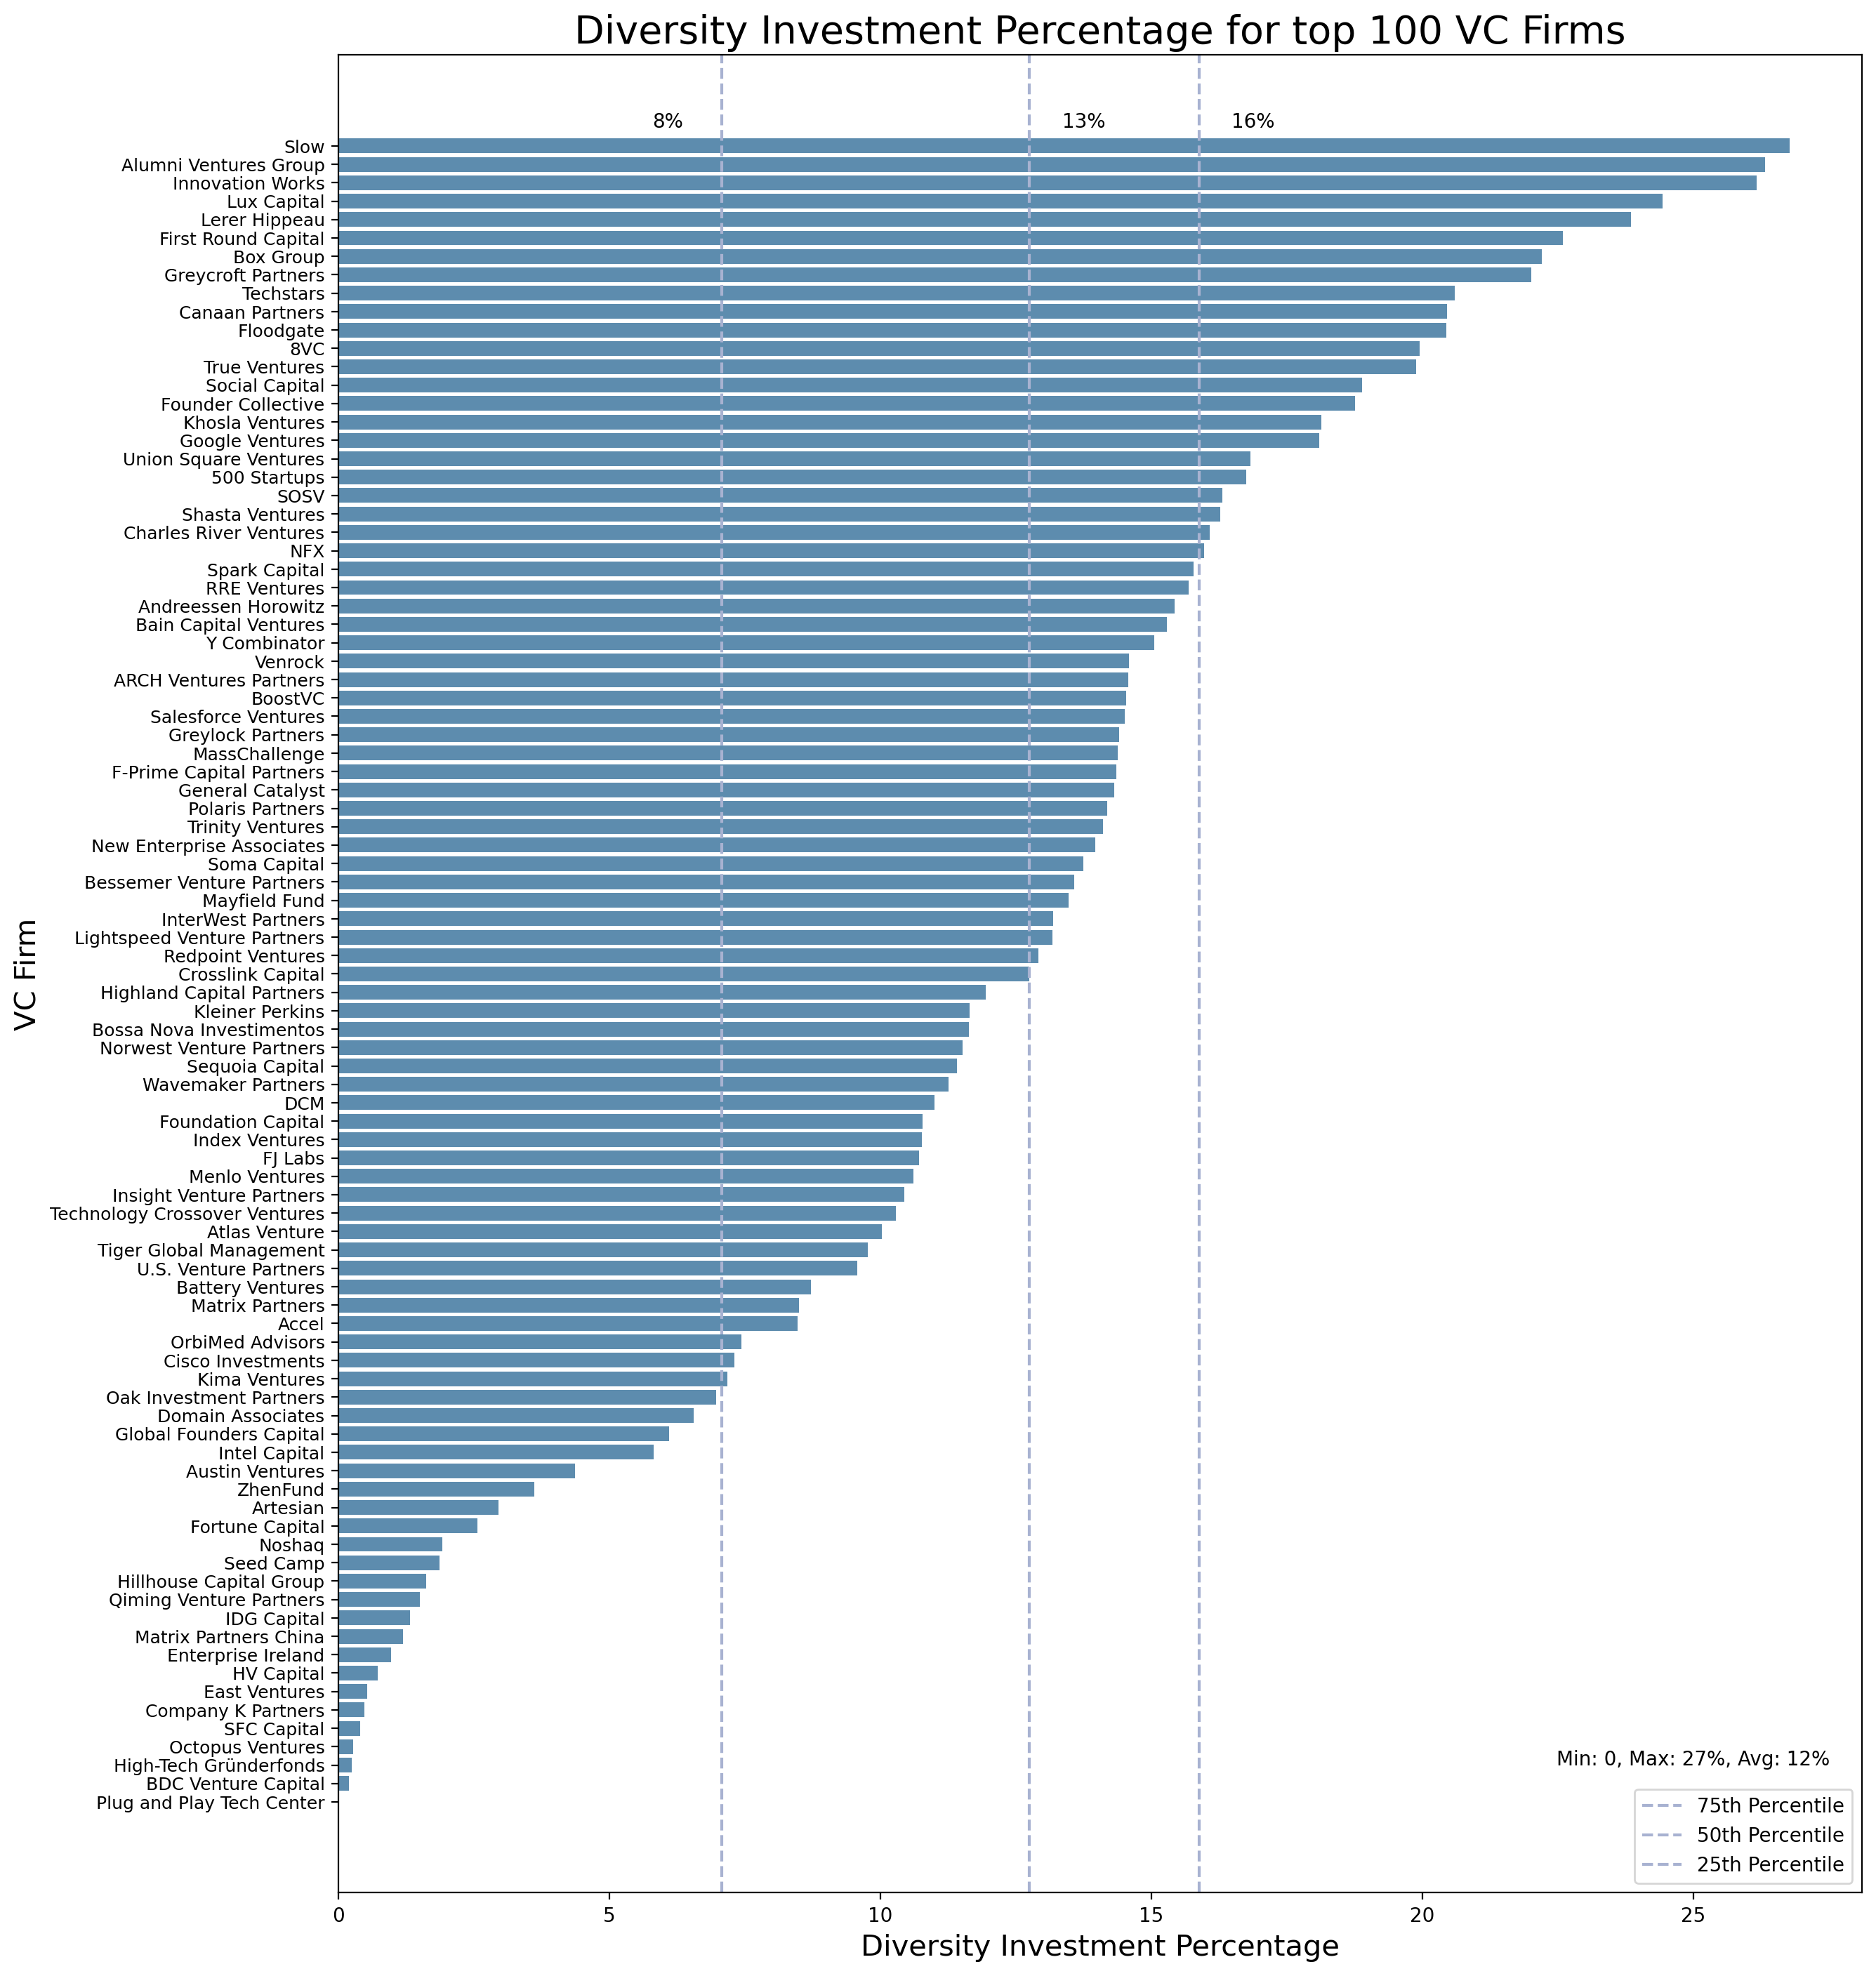

In [260]:
# create a bar chart of diversity investment percentage
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted_dip["VC Firm"],
    df_sorted_dip["DIP: Diversity Investment Percentage"],
    color="#5D8CAE",
)
ax.set_title(
    "Diversity Investment Percentage for top 100 VC Firms", fontsize=20
)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Percentage", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 75
)
pv_50 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 50
)
pv_25 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 25
)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75 + 1)) + "%",
    xy=(pv_75 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1) + "%",
    xy=(pv_50 + 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1) + "%",
    xy=(pv_25 - 1, -1),
    ha="center",
    annotation_clip=False,
)
ax.annotate("Min: 0, Max: 27%, Avg: 12%", xy=(25, 88), ha="center")
ax.legend(loc="lower right")
plt.gca().invert_yaxis()
plt.show()


In [261]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investment Percentage for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


In [255]:
df_sorted["Nondiversity Investment Count"] = (
    df_sorted["Total Investment Count"]
    - df_sorted["Diversity Investment Count"]
)

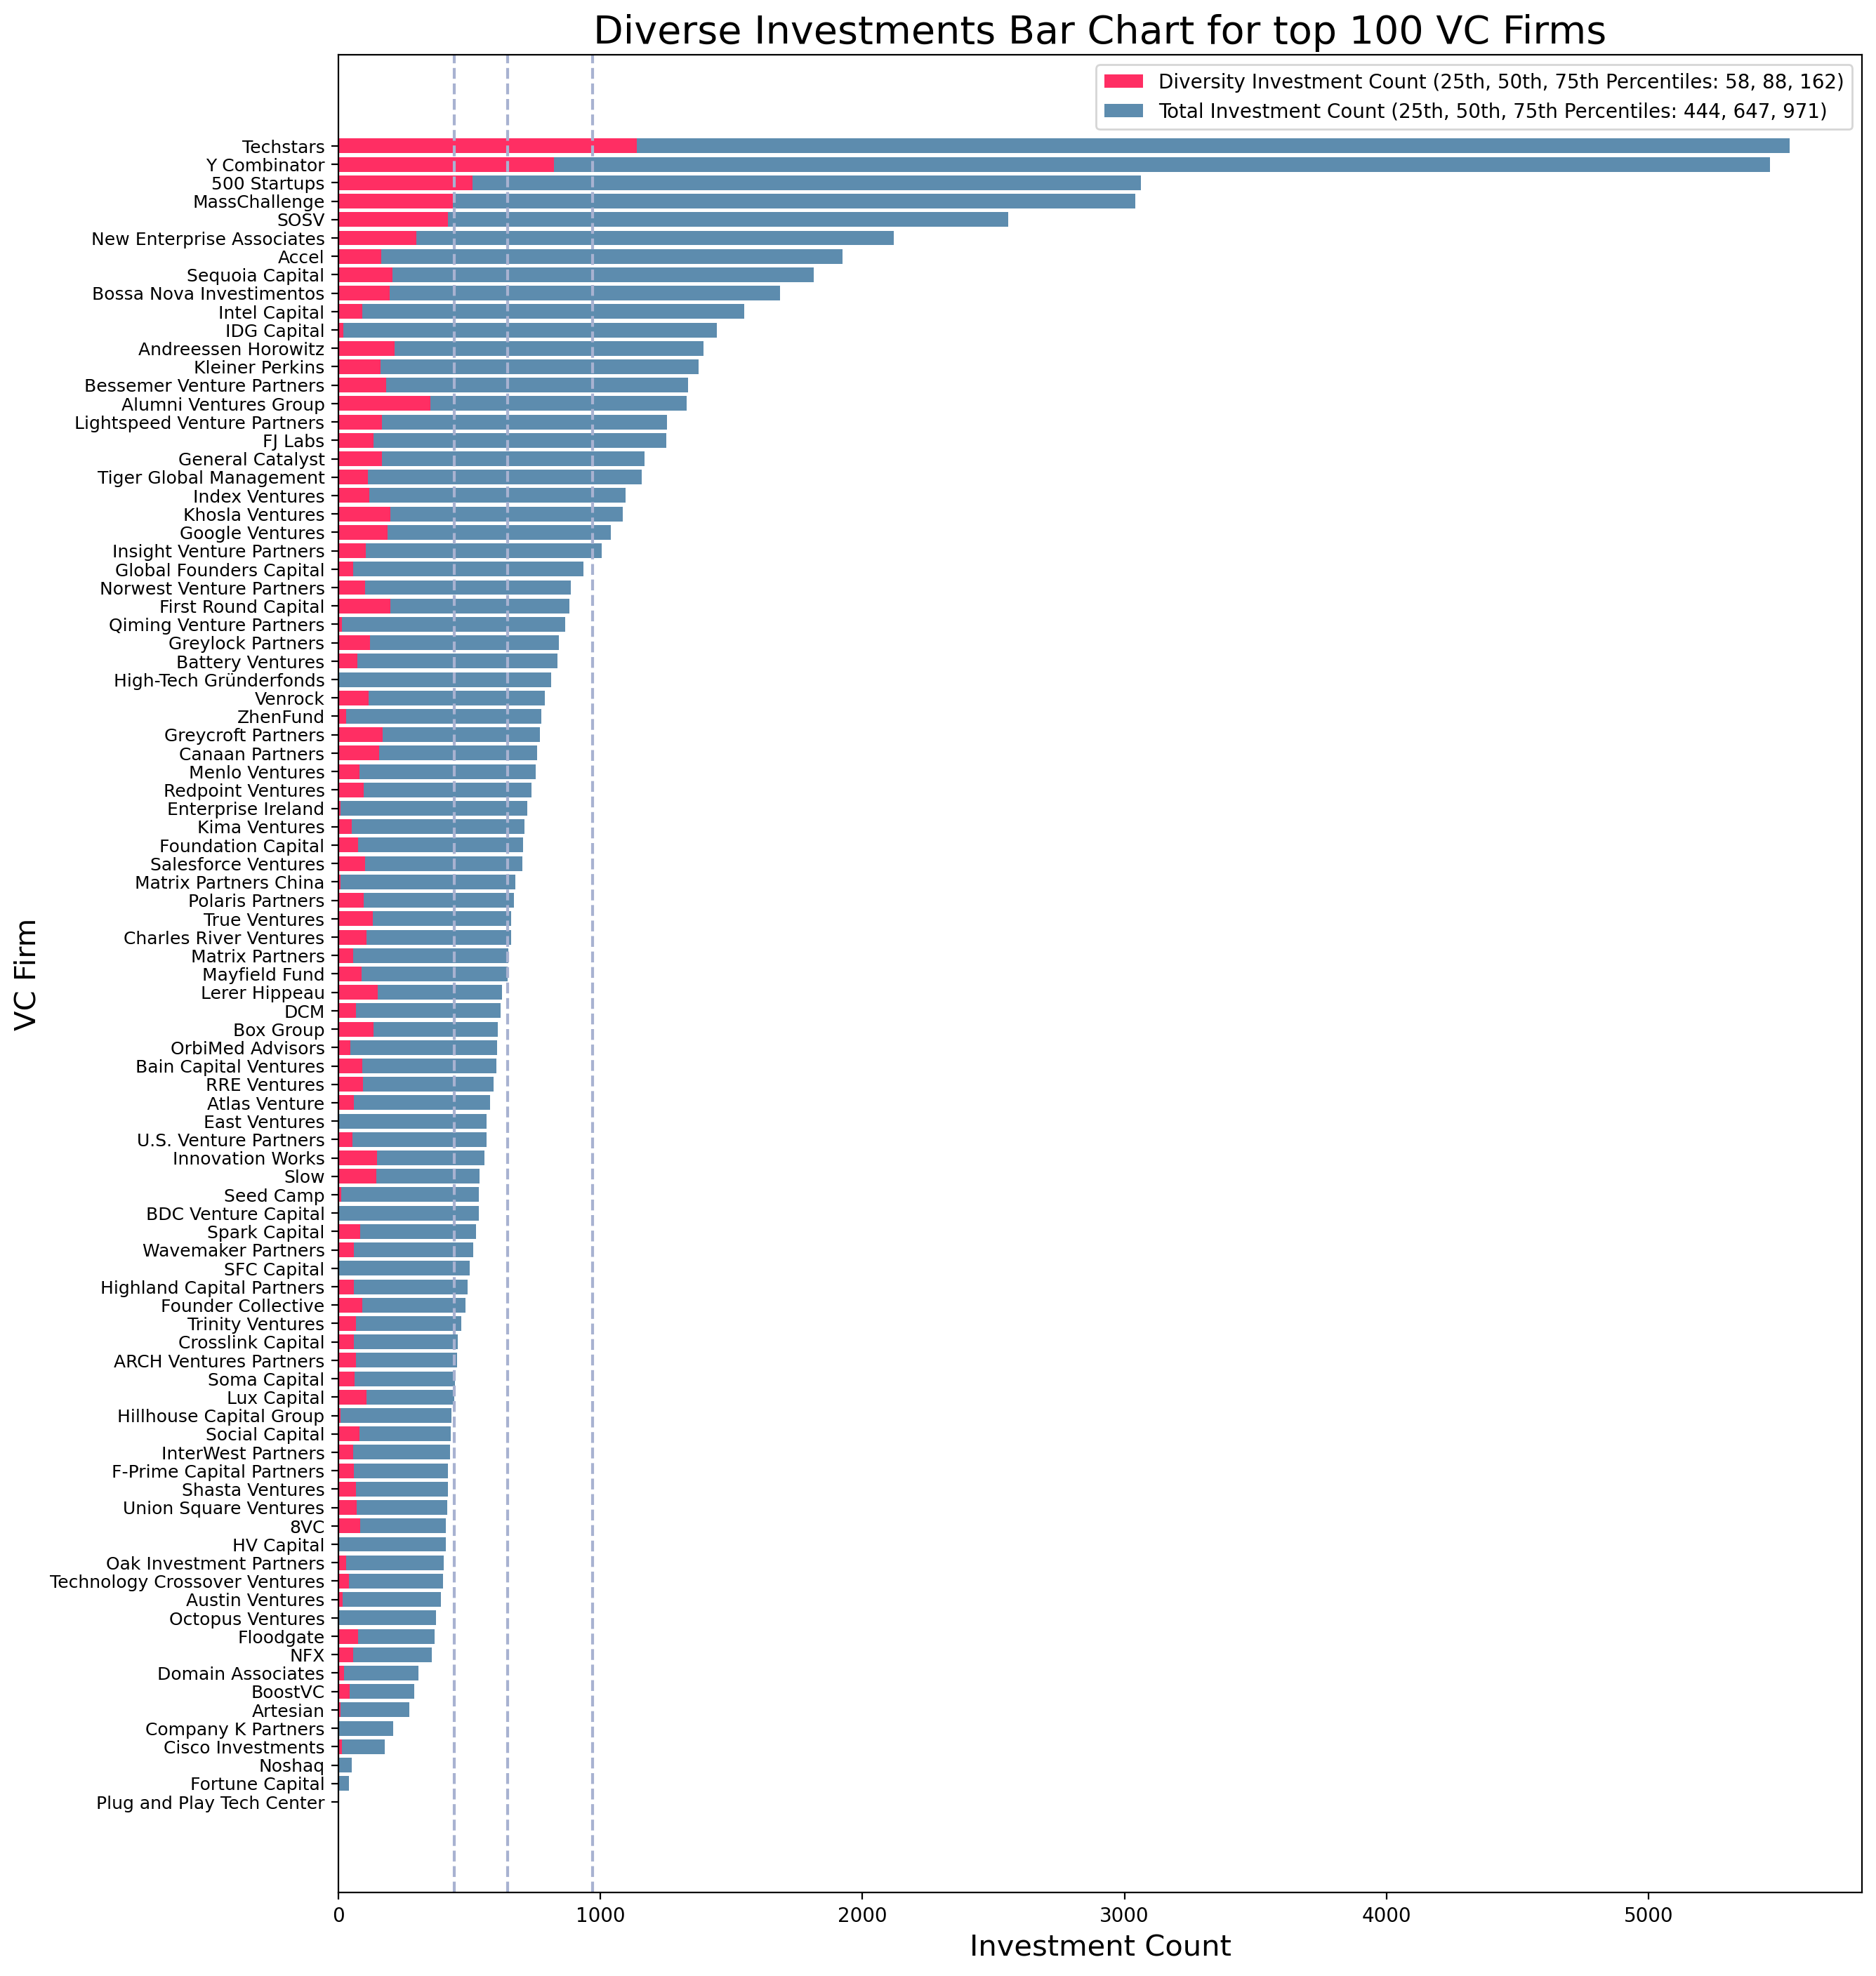

In [256]:
# combine all three charts
# width = 0.3
fig, ax = plt.subplots(figsize=(14, 17))

ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Diversity Investment Count"],
    color="#ff2e63",
)
ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Nondiversity Investment Count"],
    color="#5D8CAE",
    left=df_sorted["Diversity Investment Count"],
)
ax.set_title("Diverse Investments Bar Chart for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
ax.legend(
    [
        "Diversity Investment Count (25th, 50th, 75th Percentiles: 58, 88, 162)",
        "Total Investment Count (25th, 50th, 75th Percentiles: 444, 647, 971)",
    ]
)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--")
ax.axvline(pv_50, color="#A8B2D1", linestyle="--")
ax.axvline(pv_25, color="#A8B2D1", linestyle="--")

# dpv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
# dpv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
# dpv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
# ax.axvline(dpv_75, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_50, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_25, color="#F5A9A9", linestyle="--")

plt.gca().invert_yaxis()
plt.show()

In [257]:
# save the figure
fig.savefig(
    "../30_results/Diverse Investments Bar Chart for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


### Summary Statistics

In [258]:
df_sorted["Total Investment Count"].describe()

count      91.000000
mean      894.681319
std       894.303949
min         3.000000
25%       443.000000
50%       646.000000
75%       970.000000
max      5538.000000
Name: Total Investment Count, dtype: float64

In [259]:
df_sorted["Diversity Investment Count"].describe()

count      91.000000
mean      117.604396
std       162.914966
min         0.000000
25%        41.500000
50%        80.000000
75%       139.500000
max      1140.000000
Name: Diversity Investment Count, dtype: float64